# Importing necessary packages

In [2]:
import csv
import matplotlib.pyplot as plt
import numpy as np 
import os 
import pandas as pd 
import cv2

import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

2023-06-07 21:50:04.578605: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-07 21:50:04.797876: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-07 21:50:04.800427: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-07 21:50:05.646001: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Weird messages because I think it has something to do with linux not being able to use my nvidia GPU drivers :(

# Processing the data 

In [7]:
csv = pd.read_csv('archive/chinese_mnist.csv')
filename = csv[['suite_id', 'sample_id', 'code']].values

images = [cv2.imread(f"archive/data/data/input_{suite_id}_{sample_id}_{code}.jpg") for suite_id, sample_id, code in filename]

labels = [ [x - 1] for x in csv['code'].values ]

In [10]:
from sklearn.model_selection import train_test_split
images = np.array(images)
labels = np.array(labels)

train_images, test_images, train_labels, test_labels = train_test_split(images, labels)

# Preparing the CNN

In [11]:
OUT_LAYERS = 15

model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(OUT_LAYERS))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 31, 31, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                        

inshallah we train

In [12]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=9,
                    validation_data=(test_images, test_labels))

2023-06-07 23:49:38.792295: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 138240000 exceeds 10% of free system memory.


Epoch 1/9
352/352 [==============================] - 51s 138ms/step - loss: 0.3926 - accuracy: 0.8780 - val_loss: 0.1290 - val_accuracy: 0.9587
Epoch 2/9
352/352 [==============================] - 51s 146ms/step - loss: 0.0780 - accuracy: 0.9776 - val_loss: 0.1044 - val_accuracy: 0.9643
Epoch 3/9
352/352 [==============================] - 52s 147ms/step - loss: 0.0439 - accuracy: 0.9877 - val_loss: 0.0837 - val_accuracy: 0.9747
Epoch 4/9
352/352 [==============================] - 54s 155ms/step - loss: 0.0296 - accuracy: 0.9911 - val_loss: 0.0508 - val_accuracy: 0.9848
Epoch 5/9
352/352 [==============================] - 50s 143ms/step - loss: 0.0241 - accuracy: 0.9921 - val_loss: 0.0588 - val_accuracy: 0.9816
Epoch 6/9
352/352 [==============================] - 49s 140ms/step - loss: 0.0321 - accuracy: 0.9904 - val_loss: 0.0591 - val_accuracy: 0.9821
Epoch 7/9
352/352 [==============================] - 54s 153ms/step - loss: 0.0257 - accuracy: 0.9914 - val_loss: 0.0419 - val_accuracy:

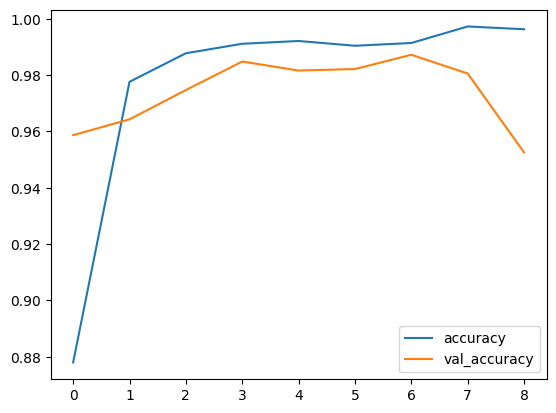

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()


Accuracy seems to go up with every epoch, but validation accuracy only seems to tank after a certain number of epochs. Looks like a classic example of overfitting.

I could probably lower the number of data per epoch, but its a hyperparameter which may affect my gradient descent which I don't want to mess with. 

Will get to this in the next iteration....

# Evaluation

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

118/118 [==============================] - 5s 45ms/step - loss: 0.1492 - accuracy: 0.9525


In [15]:
test_acc

0.9525333046913147

In [17]:
model.save("chinatown_cnn")

INFO:tensorflow:Assets written to: chinatown_cnn/assets


INFO:tensorflow:Assets written to: chinatown_cnn/assets
